 *import libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as ml
from google.colab.patches import cv2_imshow


Loading the image

In [ ]:
import cv2

# Read the RGB image
IMG = cv2.imread("/content/drive/MyDrive/Digitale_image/image22.png",cv2.IMREAD_UNCHANGED)


In [ ]:
print(IMG.shape)

(806, 1074)


resolution of IMG in megapixel

In [ ]:
M_N=IMG.shape
M=M_N[0]
N=M_N[1]
pixels=M*N
print(" the resolution of IMG in meagapixels is:",pixels/1000000)

 the resolution of IMG in meagapixels is: 0.865644


Calculate the brightness and contrast

In [ ]:
# calculate the sum of values of pixels
I=IMG.astype(np.uint32)
total = 0
for i in range(M):
    for j in range(N):
        total += I[i, j]
#calculate the brightness wich is (1/number of pixels)/total
brigthness= total/pixels # pixels =M*N i calculate it in previous
print("the brightness of IMG is:",brigthness)

the brightness of IMG is: 158.89909015715466


In [ ]:
#calculate the mean
def moyenne(I):
    somme = 0
    for i in range(M):
        for j in range(N):
            somme += I[i, j]
    return somme / pixels

In [ ]:
m=total/pixels # mean = total of values / number of pixels
contrast=np.sqrt(moyenne((I - m)**2))
print("the contrast of IMG is:",contrast)

the contrast of IMG is: 66.71556893359637


In [ ]:
print(I)

[[219 219 219 ... 189 190 190]
 [219 220 219 ... 189 190 190]
 [220 220 220 ... 189 190 190]
 ...
 [122 120 119 ... 129 133 135]
 [121 118 117 ... 131 134 132]
 [123 118 117 ... 138 134 129]]


In [ ]:
#Convert back IMG to uint8
I = IMG.astype(np.uint8)

In [ ]:
print(I)

[[219 219 219 ... 189 190 190]
 [219 220 219 ... 189 190 190]
 [220 220 220 ... 189 190 190]
 ...
 [122 120 119 ... 129 133 135]
 [121 118 117 ... 131 134 132]
 [123 118 117 ... 138 134 129]]


Quantize IMG

In [ ]:
print(IMG)

[[219 219 219 ... 189 190 190]
 [219 220 219 ... 189 190 190]
 [220 220 220 ... 189 190 190]
 ...
 [122 120 119 ... 129 133 135]
 [121 118 117 ... 131 134 132]
 [123 118 117 ... 138 134 129]]


In [ ]:

L=np.power(2,8) # Original L
Q=[128,32,2]  # 128,32,2 levels
I_q1=np.round(I / (L/Q[0])) * (L/Q[0]) # L/128= step -> round(I/step)*step
I_q2=np.round(I / (L/Q[1])) * (L/Q[1]) # L/32 step -> round(I/step)*step
I_q3 = np.where(I < 128, 0, 255) # L/2 step -> round(I/step)*step


In [ ]:
I_q1 = I_q1.astype(np.uint8)
I_q2 = I_q2.astype(np.uint8)
I_q3 = I_q3.astype(np.uint8)

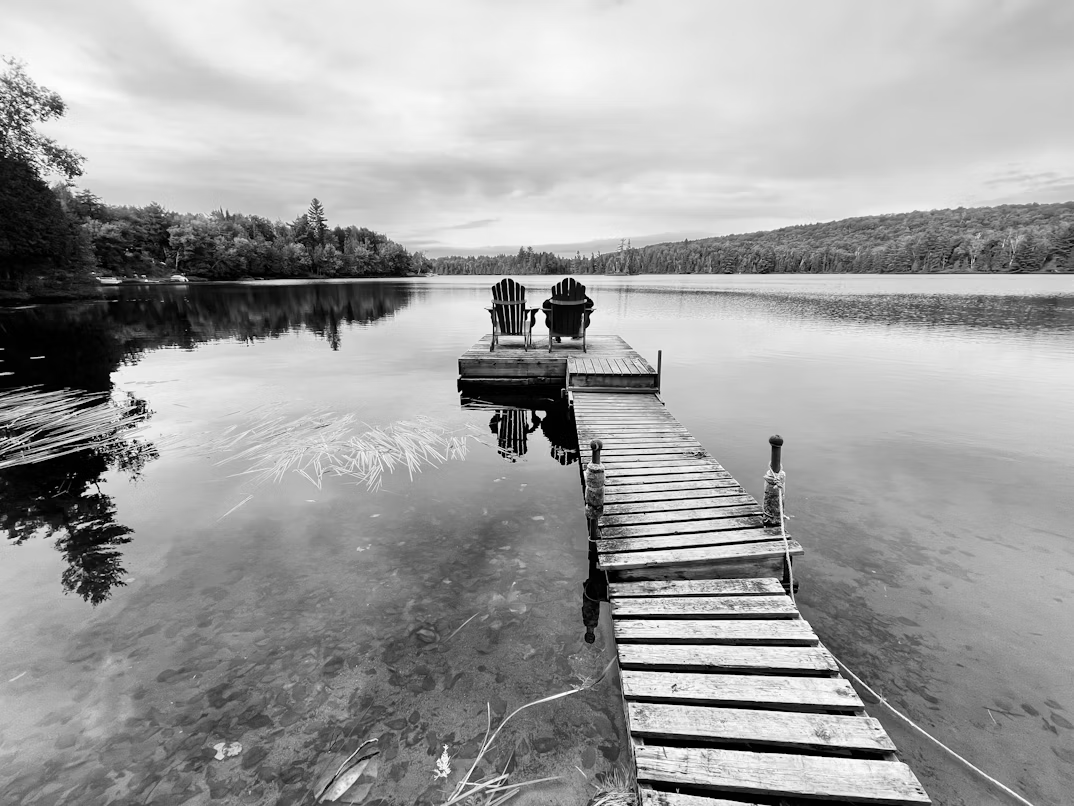

In [ ]:
cv2_imshow(I)

In [ ]:
print(I_q1)

[[220 220 220 ... 188 190 190]
 [220 220 220 ... 188 190 190]
 [220 220 220 ... 188 190 190]
 ...
 [122 120 120 ... 128 132 136]
 [120 118 116 ... 132 134 132]
 [124 118 116 ... 138 134 128]]


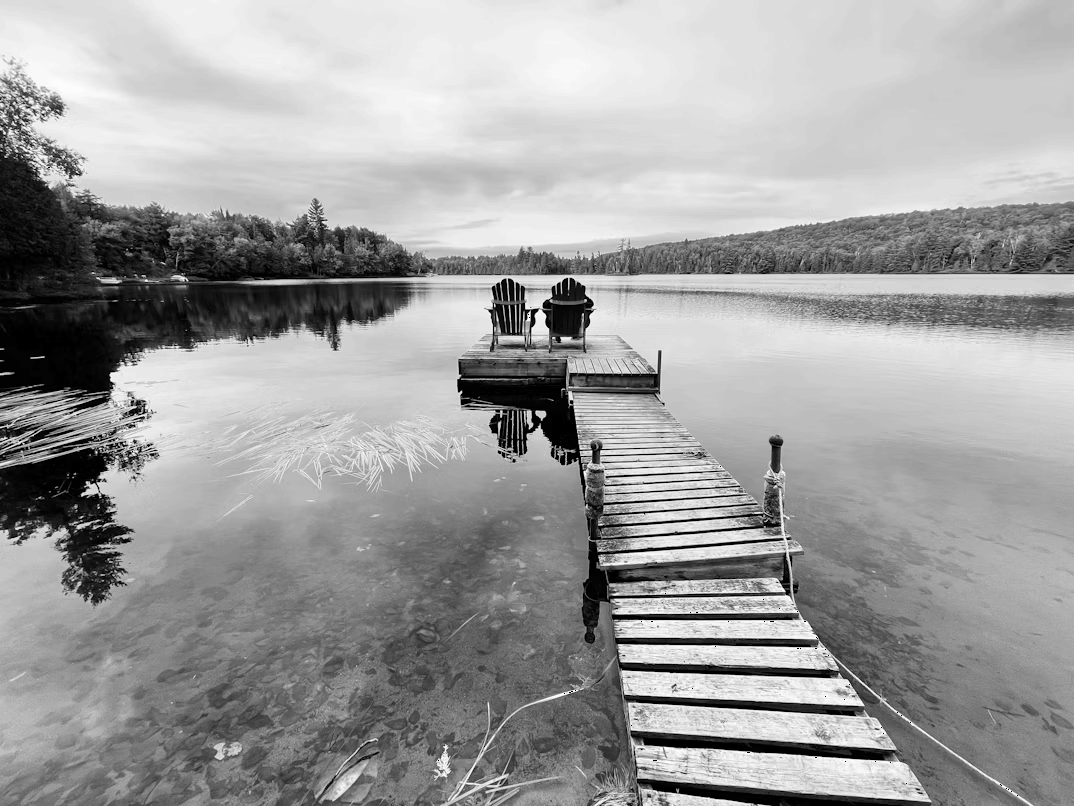

In [ ]:
cv2_imshow(I_q1)

In [ ]:

print(I_q2)


[[216 216 216 ... 192 192 192]
 [216 224 216 ... 192 192 192]
 [224 224 224 ... 192 192 192]
 ...
 [120 120 120 ... 128 136 136]
 [120 120 120 ... 128 136 128]
 [120 120 120 ... 136 136 128]]


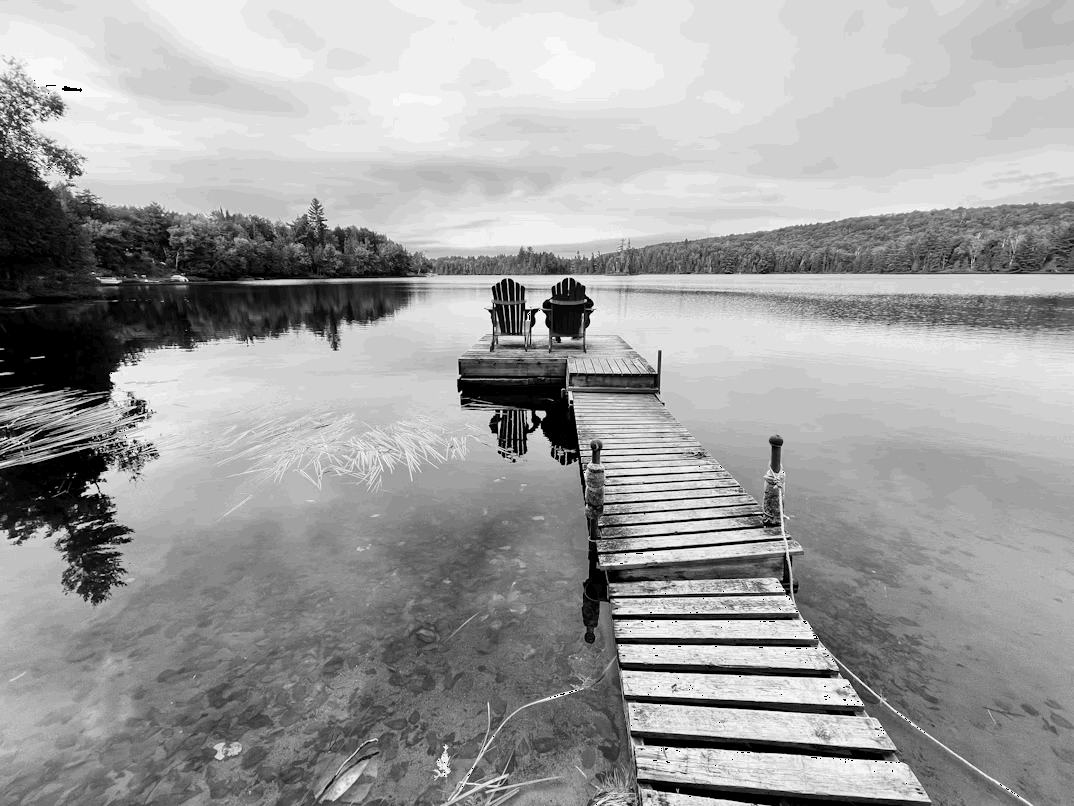

In [ ]:
cv2_imshow(I_q2)

In [ ]:

print(I_q3)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


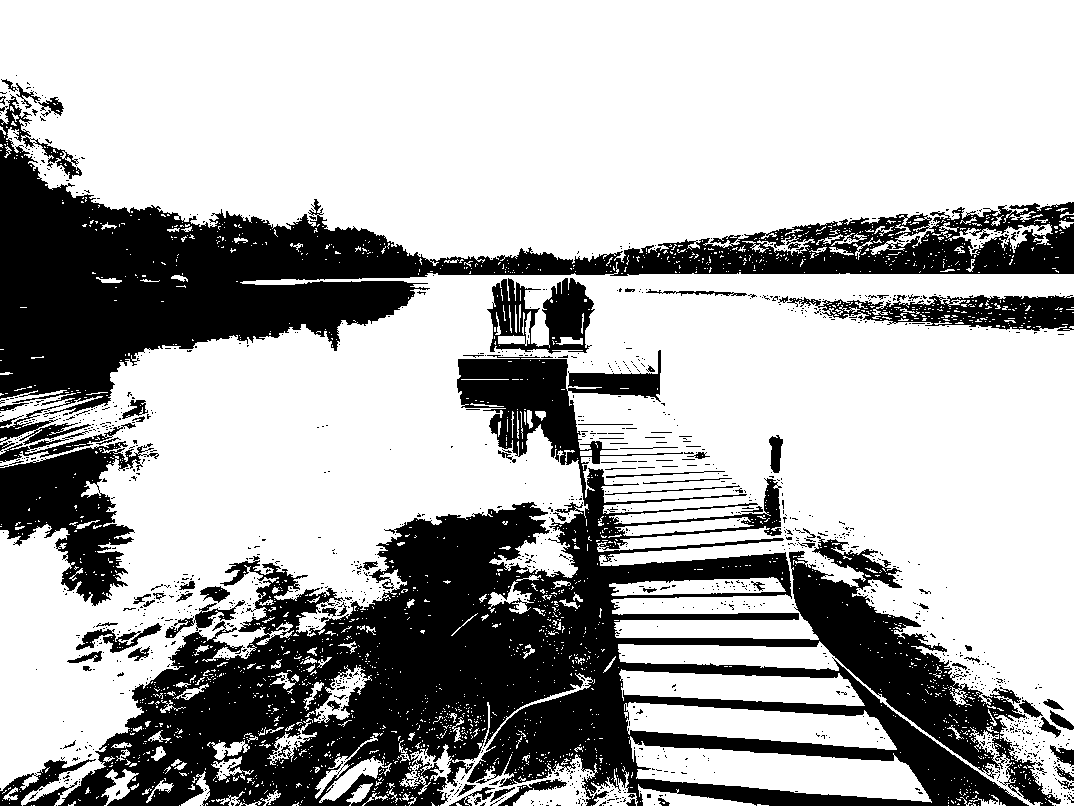

In [ ]:
cv2_imshow(I_q3)

Sub_IMG

In [ ]:
SUB_IMG = IMG[50:70, :]
SUB_IMG2=IMG[: ,20:90]

In [ ]:
cv2_imshow(SUB_IMG)

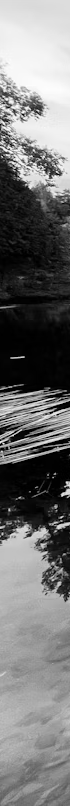

In [ ]:
cv2_imshow(SUB_IMG2)

binirization

In [ ]:
# for threshold=10
bin1=np.zeros((M,N),dtype=np.uint8)
for i in range(M):
    for j in range(N):
        if I[i, j] <= 10:
            bin1[i, j] = 0
        else:
            bin1[i, j] = 255
# for threshold=125
bin2=np.zeros((M,N),dtype=np.uint8)
for i in range(M):
    for j in range(N):
        if I[i, j] <= 125:
            bin2[i, j] = 0
        else:
            bin2[i, j] = 255
# for threshold=210
bin3=np.zeros((M,N),dtype=np.uint8)
for i in range(M):
    for j in range(N):
        if I[i, j] <= 210:
            bin3[i, j] = 0
        else:
            bin3[i, j] = 255

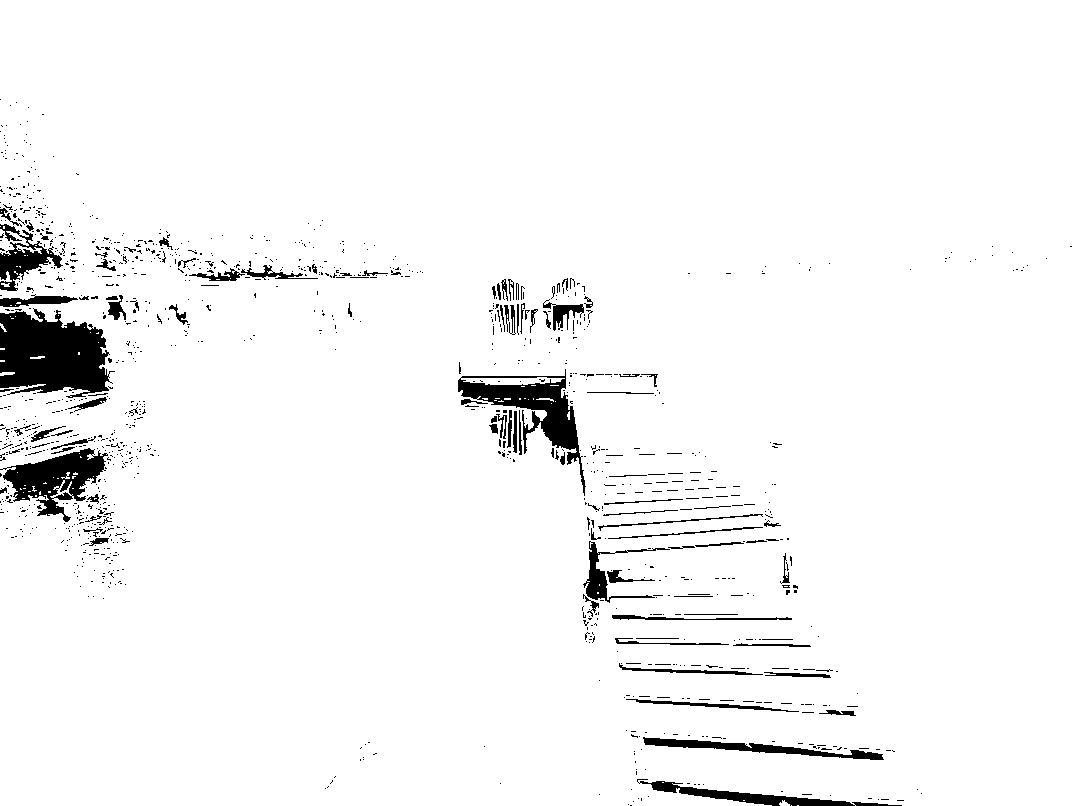

In [ ]:
cv2_imshow(bin1)


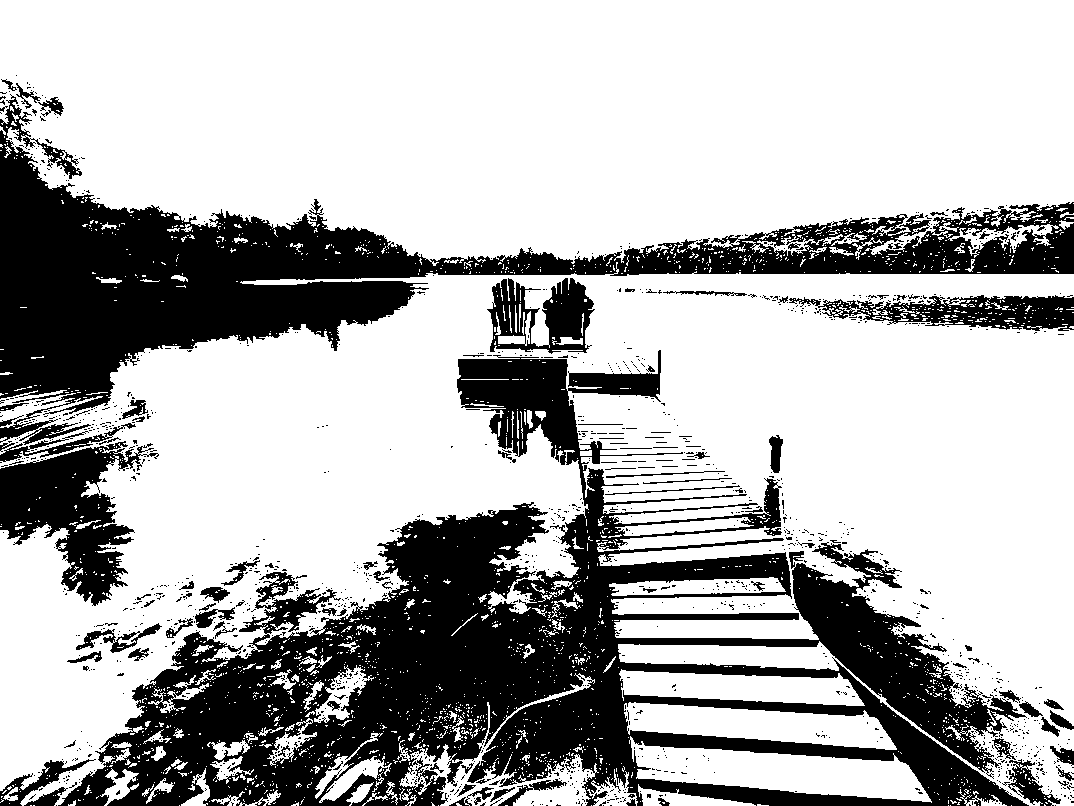

In [ ]:
cv2_imshow(bin2)


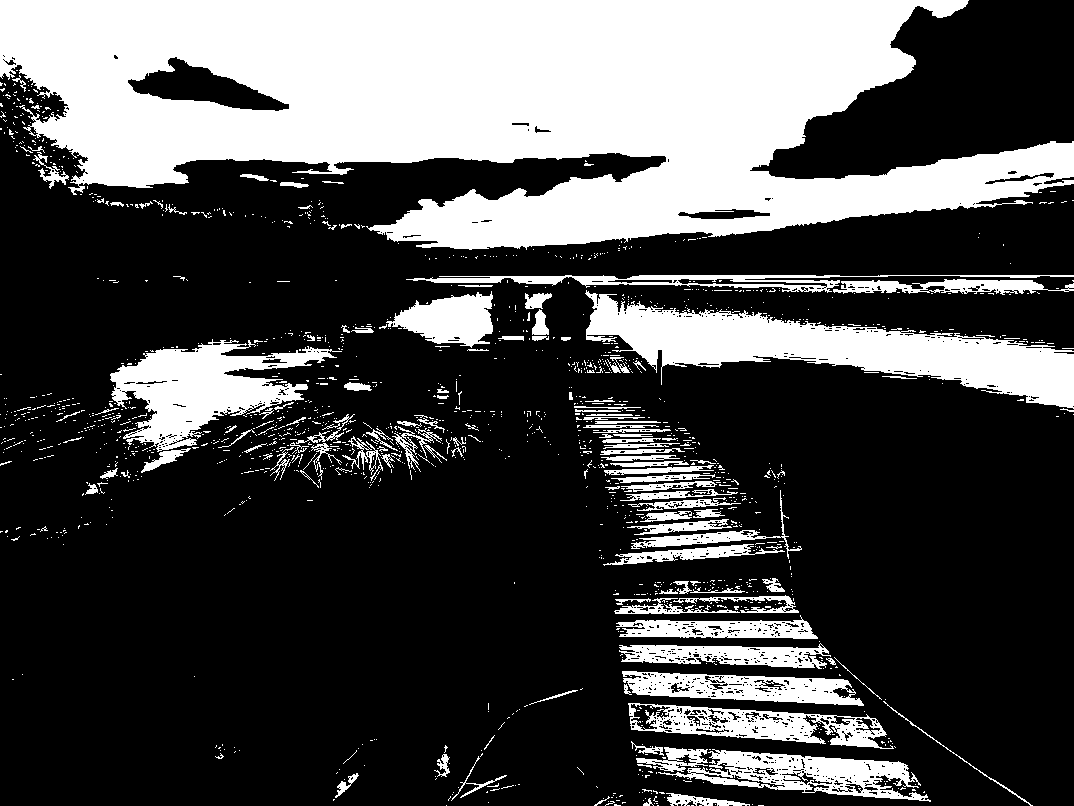

In [ ]:
cv2_imshow(bin3)

combine IMG and IMG2

In [ ]:
#by the following equation Z = 𝑎𝑋 + 𝑏𝑌
#using (0.1,0.9)
IMG2 = cv2.imread("/content/drive/MyDrive/Digitale_image/image11.png",cv2.IMREAD_GRAYSCALE) #read IMG2
IMG2.shape == IMG.shape #checking if the shapes are equal
combined1=0.1*IMG+0.9*IMG2

combined2=0.9*IMG+0.1*IMG2


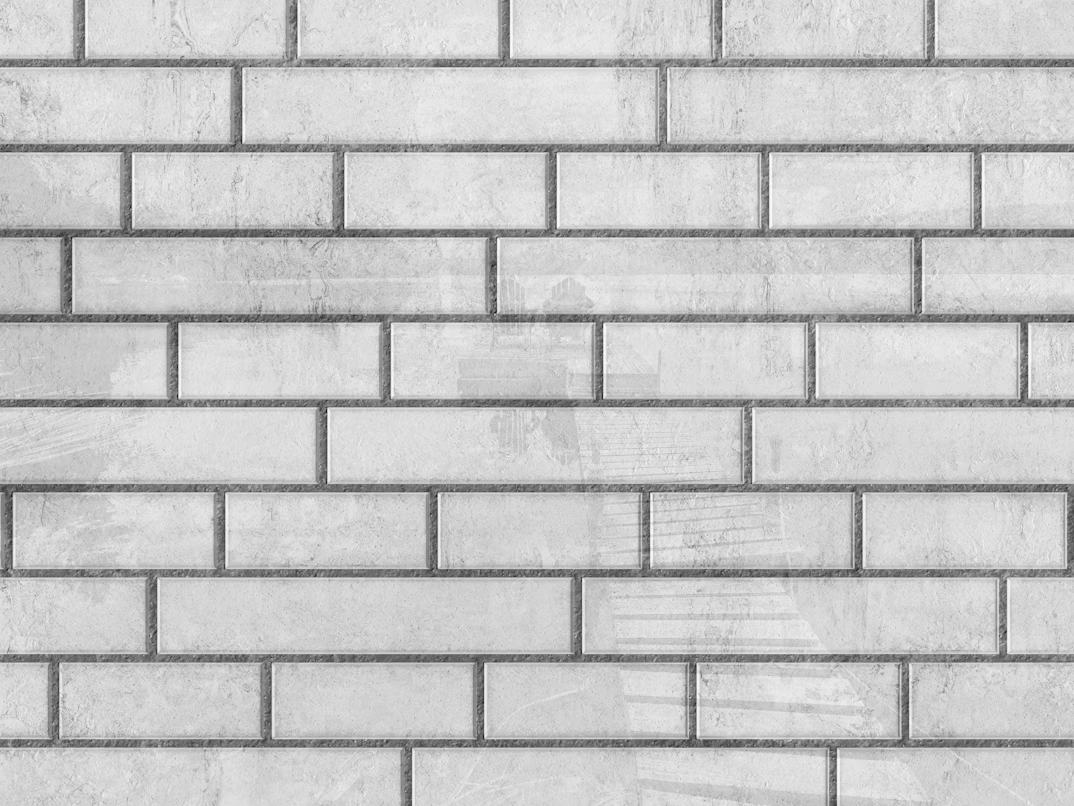

In [ ]:
# first combination
cv2_imshow(combined1)

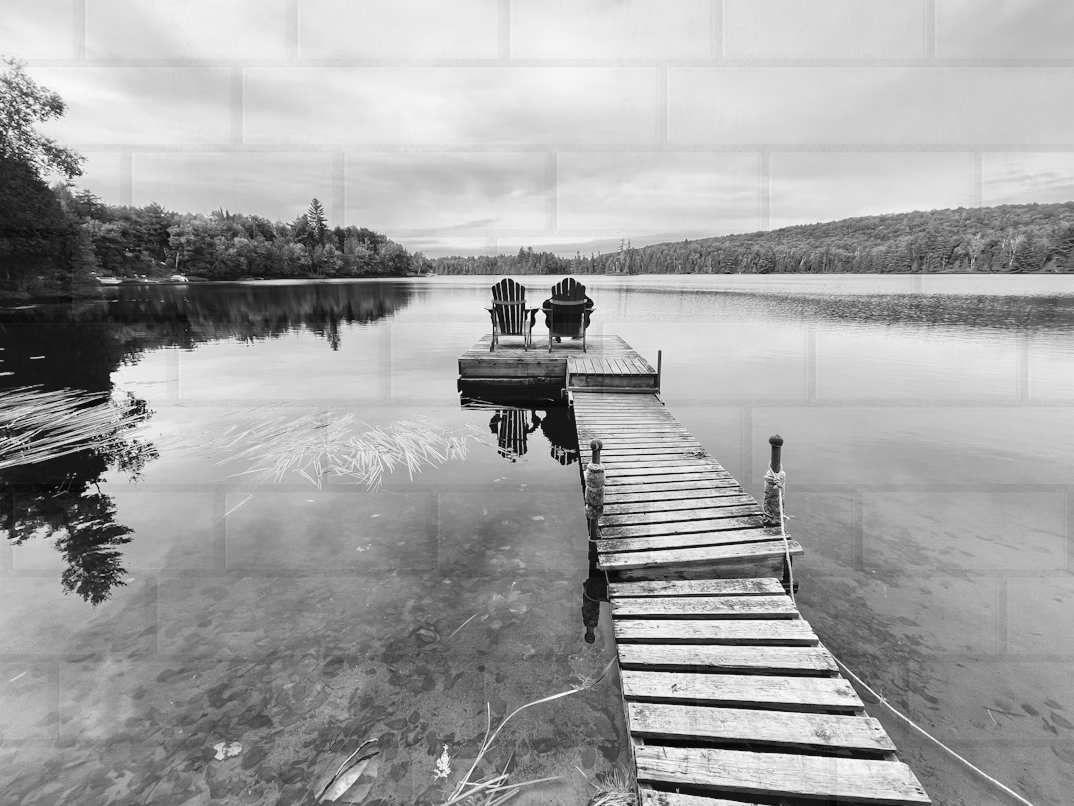

In [ ]:
#second combination
cv2_imshow(combined2)

Generate two binary (0/1) images

In [ ]:



image1 = np.zeros((100, 100), dtype=np.uint8)
image2 = np.zeros((100, 100), dtype=np.uint8)

image1[20:60, 20:60] = 1
image2[40:80, 40:80] = 1
# logic operations

#AND
result1 = np.zeros_like(image1)
for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        if image1[i,j]==1 and image2[i, j] == 1:
            result1[i,j] = 1
        else:
            result1[i,j] = 0

#OR
result2 = np.zeros_like(image1)

for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        if (image1[i,j] !=  image2[i,j]) or (image1[i, j]==1 and image2[i, j]==1):
            result2[i,j] = 1
        else:
            result2[i,j] = 0
 #XOR
result3 = np.zeros_like(image1)

for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        if image1[i,j] !=  image2[i,j]:
            result3[i,j] = 1
        else:
            result3[i,j] = 0
#XNOR
result4 = np.zeros_like(image1)

for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        if image1[i,j] ==  image2[i,j]:
            result4[i,j] = 1
        else:
            result4[i,j] = 0


image1 : 



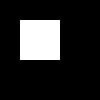

image2 : 



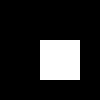

for AND operation : 



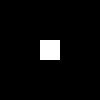

for OR operation : 



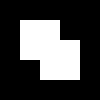

for XOR operation : 



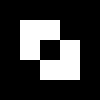

for XNOR operation : 



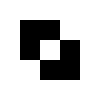

In [ ]:
print("image1 : \n")
cv2_imshow(image1*255)
print("image2 : \n")
cv2_imshow(image2*255)
print("for AND operation : \n")
cv2_imshow(result1*255)
print("for OR operation : \n")
cv2_imshow(result2*255)
print("for XOR operation : \n")
cv2_imshow(result3*255)
print("for XNOR operation : \n")
cv2_imshow(result4*255)



morphological operations

In [ ]:
image3 = np.zeros((100, 100), dtype=np.uint8)

# Draw shapes
image3[20:50, 20:50] = 1    #  square
image3[55:80, 30:70] = 1    #  rectangle
image3[40:70, 70:90] = 1    # block
img3 = np.zeros((100, 100), dtype=np.uint8)
img3[20:60, 20:60] = 1
img3[0:19, 20:30] = 1
img3[61:100, 20:30] = 1
img3[30:40, 0:100] = 1
# se
se = np.ones((3, 3), dtype=np.uint8)
#erosion
def erosion(img, se):
    k = se.shape[0] // 2  # origin of the SE
    eroded = np.zeros_like(img)

    for i in range(k, img.shape[0]-k):
        for j in range(k, img.shape[1]-k):

            neighborhood = img[i-k:i+k+1, j-k:j+k+1]
            # Erosion: all 1s under the SE positions must match
            if np.all(neighborhood[se==1] == 1):
                eroded[i, j] = 1
            else:
                eroded[i, j] = 0
    return eroded

#dilation
def dilation(img, se):
    k = se.shape[0] // 2
    dilated = np.zeros_like(img)

    for i in range(k, img.shape[0]-k):
        for j in range(k, img.shape[1]-k):
            neighborhood = img[i-k:i+k+1, j-k:j+k+1]
            # Dilation: if any pixel under SE=1 is 1
            if np.any(neighborhood[se==1] == 1):
                dilated[i, j] = 1
            else:
                dilated[i, j] = 0
    return dilated








image3  : 



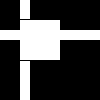

eroded : 



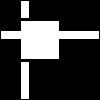

dilated : 



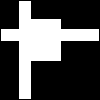

opened : 



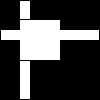

closed : 



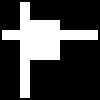

In [ ]:

print("image3  : \n")

cv2_imshow(img3*255)

print("eroded : \n")
eroded_image = erosion(img3,se)

cv2_imshow(eroded_image*255)

print("dilated : \n")
dilated_image = dilation(img3,se)
cv2_imshow(dilated_image*255)

print("opened : \n")
opened = dilation(eroded_image, se)

cv2_imshow(opened*255)

print("closed : \n")
closed = erosion(dilated_image, se)

cv2_imshow(closed*255)



RGB image

In [ ]:
IMG_RGB = cv2.imread('/content/drive/MyDrive/Digitale_image/pexels-cup-of-couple-8014215.jpg',cv2.IMREAD_UNCHANGED)   # read image

red_channel = IMG_RGB.copy()
blue_channel = IMG_RGB.copy()
green_channel = IMG_RGB.copy()
red_channel[:, :, 0] = 0
red_channel[:, :, 1] = 0

blue_channel[:, :, 1] = 0
blue_channel[:, :, 2] = 0

green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0

print(f"Image shape: {IMG_RGB.shape}")


Image shape: (5464, 8192, 3)


In [ ]:
cv2_imshow(red_channel)

In [ ]:
cv2_imshow(blue_channel)

In [ ]:
cv2_imshow(green_channel)

In [ ]:
# Print the shape to see dimensions
print("Image shape:", IMG_RGB.shape)

# Get the pixel at row=10, col=15
pixel = IMG_RGB[10, 15]

# Display the values clearly
print(f"Pixel at (10,15): R={pixel[0]}, G={pixel[1]}, B={pixel[2]}")

Image shape: (5464, 8192, 3)
Pixel at (10,15): R=208, G=201, B=204


Convert the RGB_IMG to gray-level

In [ ]:
#𝑰𝑮𝑳 (𝑿, 𝒀) = 𝟎.𝟐𝟗 × 𝑰𝑹 (𝑿,𝒀) + 𝟎.𝟓𝟖 × 𝑰𝑮 (𝑿,𝒀) + 𝟎.𝟏𝟏 × 𝑰𝑩 (𝑿,𝒀)
IMG_GL=  0.29 * IMG_RGB[:, :, 2] + 0.58 * IMG_RGB[:, :, 1] + 0.11 * IMG_RGB[:, :, 0]
print("image before converting \n")
cv2_imshow(IMG_RGB)
print("image after converting \n")
cv2_imshow(IMG_GL)
cv2_imshow(IMG_GL)

Conver RGB to YCBCR color space

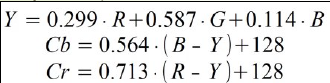

In [ ]:

# Split channels
R = IMG_RGB[:, :, 2].astype(float)
G = IMG_RGB[:, :, 1].astype(float)
B = IMG_RGB[:, :, 0].astype(float)

# Apply formulas
Y  = 0.299 * R + 0.587 * G + 0.114 * B
Cb = 0.564 * (B - Y) + 128
Cr = 0.713 * (R - Y) + 128

# Stack them into one image
IMG_YCbCr = cv2.merge([Y, Cb, Cr]).astype(np.uint8)
cv2_imshow(IMG_YCbCr)

Conver RGB to HSV color space

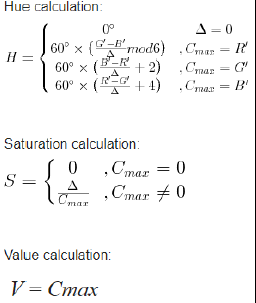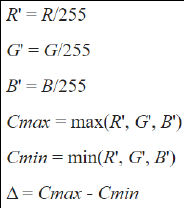

In [ ]:
def max_HSV(AR1, AR2, AR3):
    M = AR1.shape[0]
    N = AR1.shape[1]
    result = np.zeros((M, N), dtype=AR1.dtype)
    for i in range(M):
        for j in range(N):
            if AR1[i,j] >= AR2[i,j] and AR1[i,j] >= AR3[i,j]:
                result[i,j] = AR1[i,j]
            elif AR2[i,j] >= AR1[i,j] and AR2[i,j] >= AR3[i,j]:
                result[i,j] = AR2[i,j]
            else:
                result[i,j] = AR3[i,j]
    return result

def min_HSV(AR1, AR2, AR3):
    M = AR1.shape[0]
    N = AR1.shape[1]
    result = np.zeros((M, N), dtype=AR1.dtype)
    for i in range(M):
        for j in range(N):
            if AR1[i,j] <= AR2[i,j] and AR1[i,j] <= AR3[i,j]:
                result[i,j] = AR1[i,j]
            elif AR2[i,j] <= AR1[i,j] and AR2[i,j] <= AR3[i,j]:
                result[i,j] = AR2[i,j]
            else:
                result[i,j] = AR3[i,j]
    return result

N_R = IMG_RGB[:, :, 2] / 255.0
N_G = IMG_RGB[:, :, 1] / 255.0
N_B = IMG_RGB[:, :, 0] / 255.0
cmax=max_HSV(N_R, N_G, N_B)
cmin=min_HSV(N_R, N_G, N_B)
V=cmax
delta=cmax-cmin
H = np.zeros_like(N_R)
S = np.zeros_like(N_R)
cond_0=(delta == 0)
H[cond_0] = 0
cond_1 = (cmax == N_R) & (delta != 0)
H[cond_1] = 60 * (((N_G[cond_1] - N_B[cond_1]) / delta[cond_1]) % 6)
cond_2 = (cmax == N_G) & (delta != 0)
H[cond_2] = 60 * (((N_B[cond_2] - N_R[cond_2]) / delta[cond_2]) + 2)
cond_3 = (cmax == N_B) & (delta != 0)
H[cond_3] = 60 * (((N_R[cond_3] - N_G[cond_3]) / delta[cond_3]) + 4)
cond_sat_0 = (cmax == 0)
S[cond_sat_0] = 0
cond_sat_1 = ~cond_sat_0
S[cond_sat_1] = delta[cond_sat_1] / cmax[cond_sat_1]
HSV = cv2.merge([H, S, V]).astype(np.uint8)
cv2_imshow(HSV*255)

In [ ]:
H_uint8 = (H / 2).astype(np.uint8)       # scale 0–360 -> 0–180
S_uint8 = (S * 255).astype(np.uint8)     # scale 0–1 -> 0–255
V_uint8 = (V * 255).astype(np.uint8)     # scale 0–1 -> 0–255

HSV_vis = cv2.merge([H_uint8, S_uint8, V_uint8])
cv2_imshow(HSV_vis)